#  Capstone Project: Analytic Report on Stanford's Deep Solar and Future Research Avenues
### By Mitch Shiles



 The 2019 IPCC report reflects the ever-growing problem of anthropogenic climate change? It is more important than ever that the United States begins to rapidly curb its greenhouse gas emissions within the next five to ten years, in order to participate with other countries in keeping the global temperature averages from rising above the 1.5C threshold. As one of the largest emitters per capita this will be no easy feat. However, rooftop solar may be a key component in a reduction of reliance on fossil fuels. Rooftop solar installations can reduce stress on electrical infrastructure and occupy space that is often underutilized. Photovoltaics (P.V.) replace energy sources that emit particulates, which in turn reduces chronic respiratory and coronary disease among populations. This report will outline trends in preexisting solar installations so as to help governments and businesses determine how to further the deployment of P.V installations in both residential and non-residential. 
The Report uses Stanford’s Deep Solar Data Set, to Answer three analytical questions. 
The Deep Solar data set utilizes  satellite imagery and machine learning in an attempt to map every solar installation in the lower 48 states. In addition to location and area of the P.V. installations, the data set compiled various demographic data taken from the American Community Survey, along with energy  prices and metrics on government incentives. Using this data the report will answer three questions. Question one: What locations have the largest concentration of solar P.V. in the lower 48 states. Question two: In the continental United States, what states have the highest per capita usage of solar power for both residential and non-residential spaces, and what influence do state incentives and net metering have over the deployment of P.V.? Question three: Nationally, what effect do electricity prices and sun exposure have on the deployment of solar technology?



In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.basemap import Basemap

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [104]:
#Load Deep Solar Census State Gini and State GDP CSVs 
Deep_Solar_df = pd.read_csv('deepsolar_tract.csv', encoding='latin1')

census = pd.read_csv("nst-est2018-01.csv")

state_gini=pd.read_csv('State Gini Index .csv')

state_gdp=pd.read_csv('bea-gdp-by-state.csv')

## Question 1: 

What locations have the largest concentrations of solar photovoltaics in the lower 48 states?



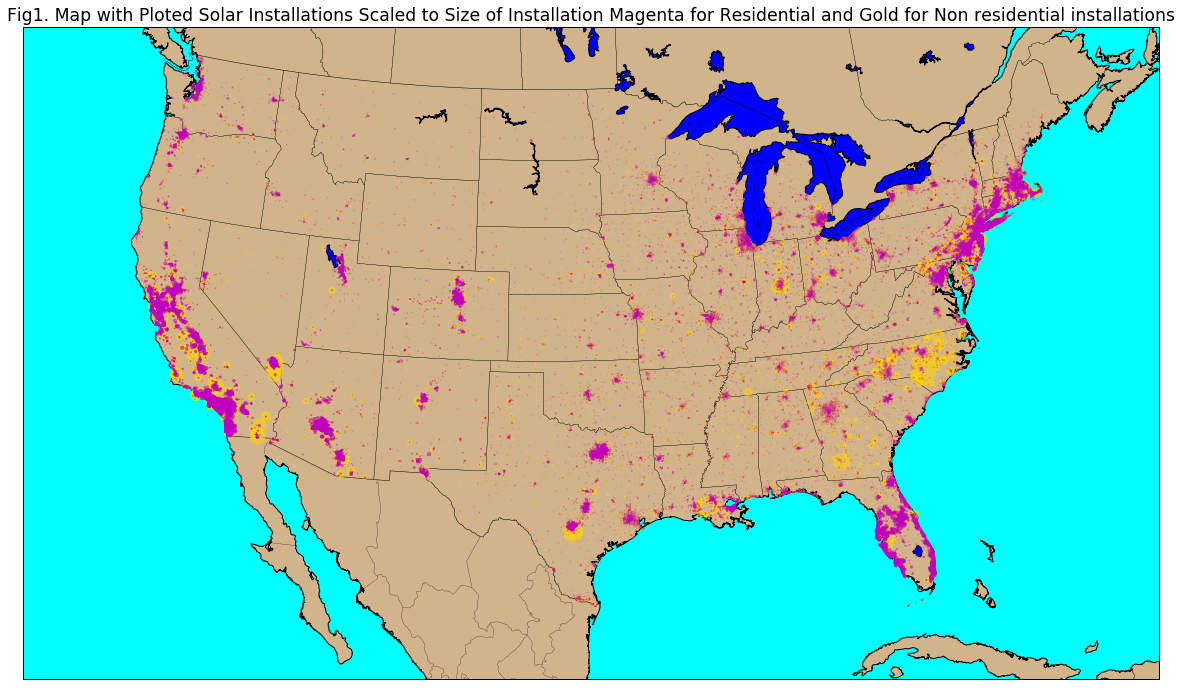

In [105]:
#llcr=18.892007, -123.742010
#urcr=48.572002, -60.451053
#mid=39.156135, -94.742782

#Get county, state, solar pannel area, latitude and longitude data from Deep Solar Dataset
energytype = Deep_Solar_df.loc[:,['county', 'state','lat', 'lon','total_panel_area',"total_panel_area_nonresidential","total_panel_area_residential"]]

#Determine figure size 
plt.figure(figsize=(24,12))

#create map lcc projection of united states 
map = Basemap(llcrnrlon=-125.,llcrnrlat=20.,urcrnrlon=-60.,urcrnrlat=47.,projection='lcc',lat_1=20.,lat_2=40.,lon_0=-100., resolution='i', area_thresh=1000.)

#fill in colors draw boundries for countries and states 
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='tan',lake_color='blue')
map.drawcountries(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
map.drawstates(linewidth=0.25, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
map.drawcoastlines()

#map.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
#map.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Fig1. Map with Ploted Solar Installations Scaled to Size of Installation Magenta for Residential and Gold for Non residential installations', fontsize='xx-large')

lons = energytype['lon'].to_numpy()
lats = energytype['lat'].to_numpy()

#x, y = map(lons, lats)
x, y = map(lons, lats)

# plot points to map and scale to pannel area and color for residential and non
plt.scatter(x, y,s=(energytype['total_panel_area_nonresidential']/1000),color='gold', alpha=.5, zorder=9)

plt.scatter(x, y,s=(energytype['total_panel_area_residential']/1000),color='m', alpha=.5, zorder=10)


plt.show()


 As can be seen in Figure 1, the map above, solar installations tend to cluster around cities and areas with a high population density. However, if we take a closer look at some of this data we will find that this is not entirely the case. Let’s see what happens when the solar installation per capita is plotted against the linear progression of population density. 


In [106]:
#group data by county and take means and sums of respective points 
Solar_county_means = Deep_Solar_df.groupby('county').mean()[['lat','daily_solar_radiation','avg_electricity_retail_rate',
                                                             'average_household_income','education_high_school_graduate',
                                                             'gini_index','per_capita_income','incentive_count_nonresidential',
                                                             'incentive_count_residential','voting_2016_gop_percentage','population_density']]

Solar_county_sums = Deep_Solar_df.groupby('county').sum()[['total_panel_area_residential','total_panel_area',
                                                          'solar_system_count','solar_system_count_residential',
                                                           'solar_system_count_nonresidential', 'total_panel_area_nonresidential',
                                                           'population','land_area']]


#merge means and sums 
Deep_Solar_county = pd.merge(Solar_county_means,Solar_county_sums, left_index=True, right_index=True)


#generate new data points for counties based on summated data 
Deep_Solar_county['county_solar_system_count_per_capita'] = (Deep_Solar_county['solar_system_count']/Deep_Solar_county['population'])                  
Deep_Solar_county['county_solar_system_count_residential_per_capita'] = (Deep_Solar_county['solar_system_count_residential']/Deep_Solar_county['population'])                  
Deep_Solar_county['county_solar_system_count_nonresidential_per_capita'] = (Deep_Solar_county['solar_system_count_nonresidential']/Deep_Solar_county['population'])                  
Deep_Solar_county['county_solar_panel_area_per_capita'] = (Deep_Solar_county['total_panel_area']/Deep_Solar_county['population'])
Deep_Solar_county['county_residential_solar_panel_area_per_capita'] = (Deep_Solar_county['total_panel_area_residential']/Deep_Solar_county['population'])
Deep_Solar_county['county_nonresidential_solar_panel_area_per_capita'] = (Deep_Solar_county['total_panel_area_nonresidential']/Deep_Solar_county['population'])
Deep_Solar_county['county_nonresidential_solar_panel_area_mean'] = (Deep_Solar_county['total_panel_area_nonresidential']/Deep_Solar_county['solar_system_count_residential'])
Deep_Solar_county['county_residential_solar_panel_area_mean'] = (Deep_Solar_county['total_panel_area_residential']/Deep_Solar_county['solar_system_count_nonresidential'])


<function matplotlib.pyplot.show(*args, **kw)>

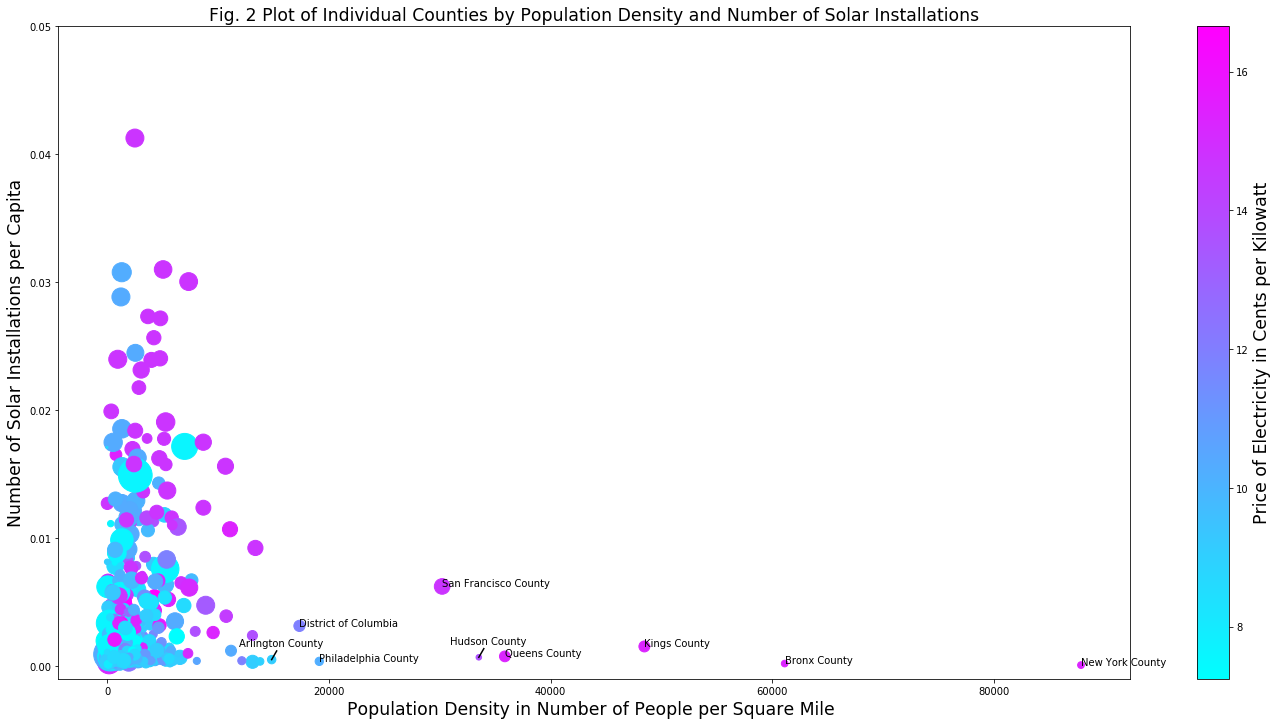

In [107]:
#Create first plot
#set figure size 
plt.figure(figsize=(24,12))

#set x and y coordinates
x1=Deep_Solar_county['population_density']
y1=Deep_Solar_county['county_solar_system_count_residential_per_capita']

#set Scaler 
s1=Deep_Solar_county['county_residential_solar_panel_area_mean']

#set color map
cmap = plt.cm.cool
norm = matplotlib.colors.Normalize(vmin=7.250000, vmax=16.650000)
c2 = cmap(norm(Deep_Solar_county.avg_electricity_retail_rate.values))

#create plot 
plt.scatter(x=x1,y=y1,s=s1,color=c2, alpha=1,label='Inline label')
plt.ylim(-.001,0.05)

#lable plot 
plt.xlabel('Population Density in Number of People per Square Mile ',fontsize='xx-large')
plt.ylabel('Number of Solar Installations per Capita',fontsize='xx-large')
plt.title('Fig. 2 Plot of Individual Counties by Population Density and Number of Solar Installations',fontsize='xx-large')

for  ind in Deep_Solar_county.index:
    i=Deep_Solar_county['population_density'][ind]
    j=Deep_Solar_county['county_solar_system_count_residential_per_capita'][ind]
    txt = Deep_Solar_county.index
    if i > 14000:  
            overlapcounty=('Hudson County','Alexandria city',
                          'Cook County','Arlington County')
            if ind in overlapcounty: 
                plt.text(i, j, s=ind,withdash=True, 
                    dashdirection=1,
                    dashlength=10,
                    rotation=0,
                    dashrotation=60,
                    dashpush=0)
            else:  
                plt.annotate(ind,(i,j))
            
    else:
        None
    
#create and label color bar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Price of Electricity in Cents per Kilowatt', rotation=90,fontsize = 'xx-large')

plt.show 



In Figure 2 above each county in the contiguous 48 states are plotted by its population density and number of solar installations per capita. The points are scaled to the size of the average solar installation and colored to represent the price of electricity in cents per kilowatt. In regard to population density, Loving County with a density of 0.175 People per square mile is equivalent to the most rural county and  New York City  with 87,824 people per square mile is equivalent to the most urban county. The five boroughs of New York City make up the top 5 counties, followed by Hudson County in NewJersey, and San Francisco County in California. When looking at this chart it appears to convey the opposite idea of the map above with a high number of solar installations clustering outside of highly dense urban areas. Yet we can also see a large number of counties clustering around zero for both the x and y-axis. If we take a look at the distribution of population density it may give us some clues as to how we might examine this data further. 



<function matplotlib.pyplot.show(*args, **kw)>

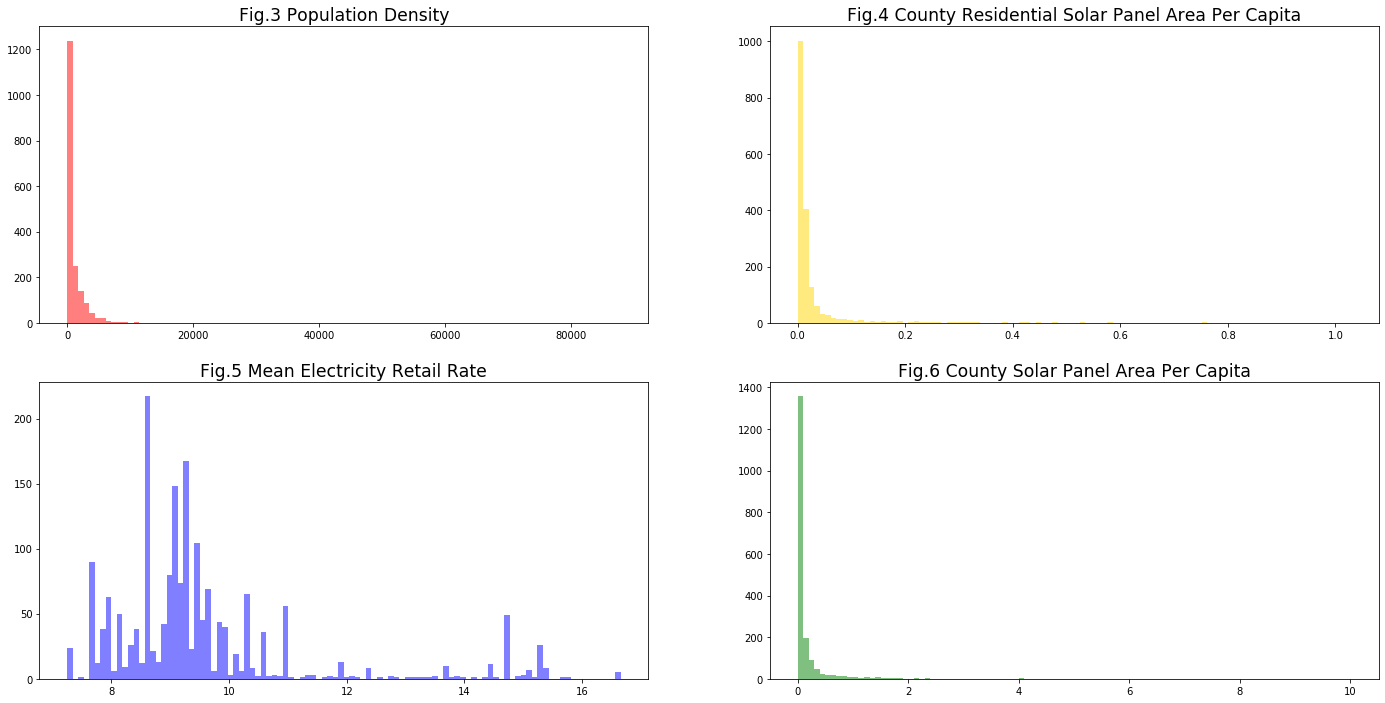

In [108]:
#Create 4 subplots 
#subplot 1
plt.figure(figsize=(24,12))
plt.subplot(2, 2, 1)
plt.hist(Deep_Solar_county['population_density'],bins=100, color='red', alpha=0.5 )
plt.title('Fig.3 Population Density',fontsize='xx-large')

#subplot 2
plt.subplot(2, 2, 2)
plt.hist(Deep_Solar_county['county_residential_solar_panel_area_per_capita'],bins=100, color='gold', alpha=0.5 )
plt.title('Fig.4 County Residential Solar Panel Area Per Capita',fontsize='xx-large')

#subplot 3
plt.subplot(2, 2, 3)
plt.hist(Deep_Solar_county['avg_electricity_retail_rate'],bins=100, color='blue', alpha=0.5 )
plt.title('Fig.5 Mean Electricity Retail Rate',fontsize='xx-large')

#subplot 4
plt.subplot(2, 2, 4)
plt.hist(Deep_Solar_county['county_solar_panel_area_per_capita'],bins=100, color='green', alpha=0.5 )
plt.title('Fig.6 County Solar Panel Area Per Capita',fontsize='xx-large')

plt.show

 In the histograms above we see counties plotted by population density(Fig.3), solar panel area per capita(Fig.4), the average electricity price(Fig.5), and average household income(Fig.6). We can see when looking at the population density that it has quite a sharp spike as it nears zero. This spike makes sense in that most of the counties in the United States are not cities or even suburbs but exist as rural areas and small towns. As we get closer to dense urban hubs, population increases in a polynomial or exponential fashion. Therefore we may want to take another look at the data in the first plot with altered scales. 

<function matplotlib.pyplot.show(*args, **kw)>

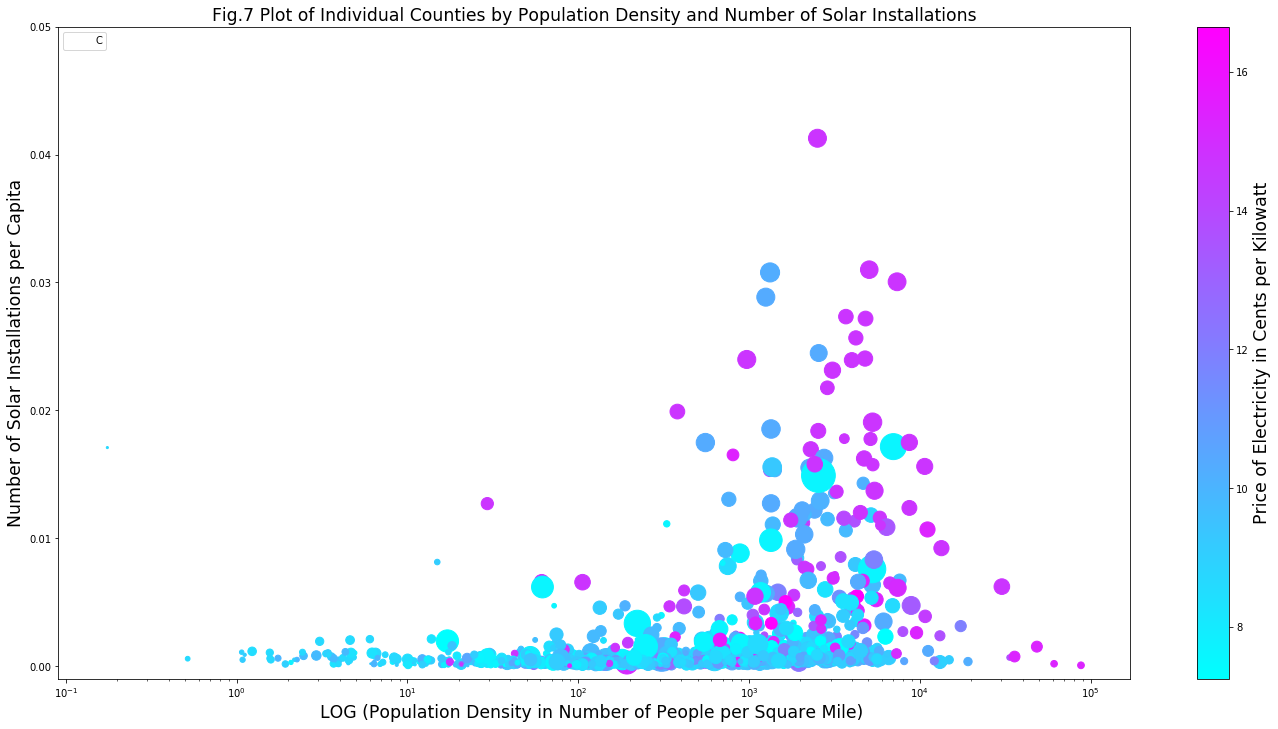

In [109]:
#Create second plot
#set figure size 
plt.figure(figsize=(24,12))

#set x and y coordinates
x2=Deep_Solar_county['population_density']
y2=Deep_Solar_county['county_solar_system_count_residential_per_capita']

#set scaler 
s2=Deep_Solar_county['county_residential_solar_panel_area_mean']

cmap = plt.cm.cool
#cmap = plt.cm.rainbow 
norm = matplotlib.colors.Normalize(vmin=7.250000, vmax=16.650000)
c2 = cmap(norm(Deep_Solar_county.avg_electricity_retail_rate.values))

plt.scatter(x=x2,y=y2,s=s2,color=c2, alpha=1,label='Inline label')

plt.xlabel('LOG (Population Density in Number of People per Square Mile) ',fontsize='xx-large')
plt.ylabel('Number of Solar Installations per Capita',fontsize='xx-large')
plt.title('Fig.7 Plot of Individual Counties by Population Density and Number of Solar Installations',fontsize='xx-large')
plt.xscale('log')
#plt.set_label('# of contacts', rotation=270)

plt.ylim(-.001,0.05)
#plt.colorbar(sm).set_yticklabels(['0','1','2','>3'])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Price of Electricity in Cents per Kilowatt', rotation=90,fontsize = 'xx-large')

plt.legend('County_scaled to average residential installation size',         
           loc=2,
           markerscale = 0.25,
           frameon = True, 
           labelspacing = 1)
           #fontsize = 'xx-large')
plt.show 



Here in Figure 7, the counties are plotted over a log scale of population density, which spreads out counties with a lower population density. In many ways, this resembles the map seen in Figure 1,  with the number of solar installations per capita increasing with population density up until about 10,000 people per square mile.  However, a marked decrease can be seen in solar installations with population densities over 10,000 people per square mile, this also holds true for many counties when the number of  P.V. installations are plotted as opposed to P.V. Installations on a per capita basis.



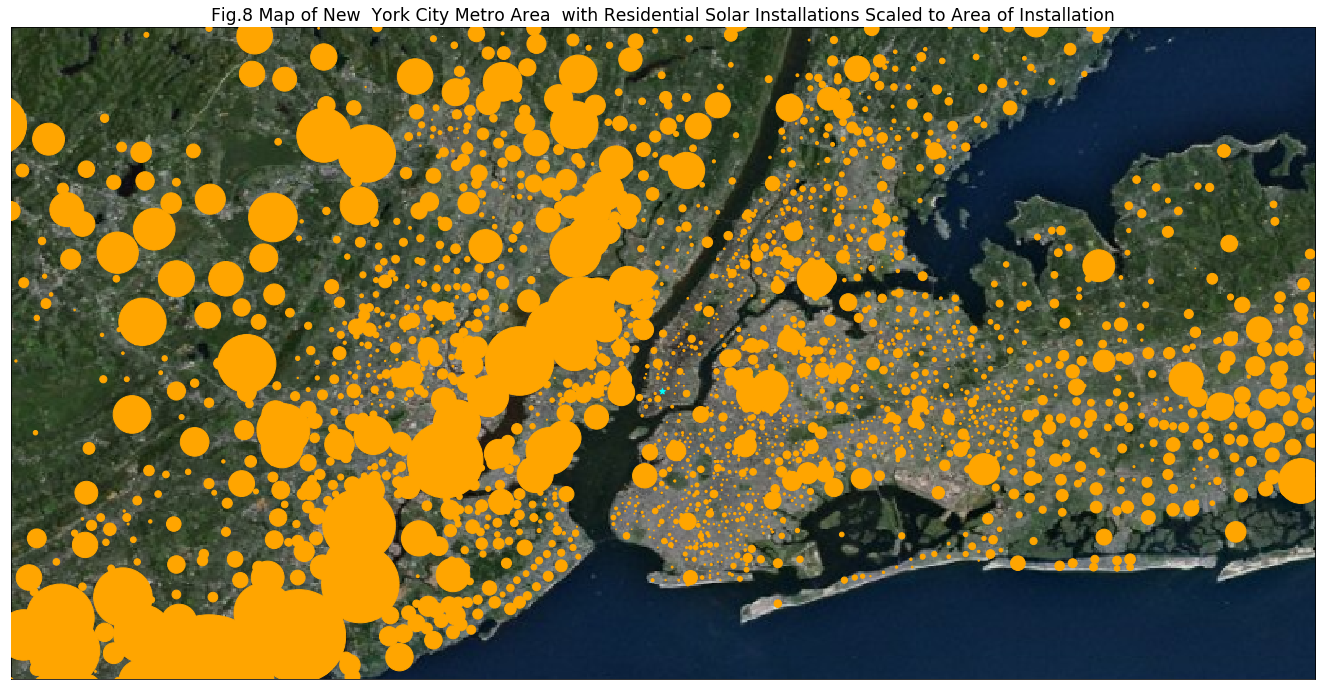

In [110]:
#Map of New York City  
#llcr=40.434461, -74.579925
#urcr=40.976010, -73.506981

#Get county, state, solar pannel area, latitude and longitude data from Deep Solar Dataset
energytype = Deep_Solar_df.loc[:,['county', 'state','lat', 'lon','total_panel_area',"total_panel_area_nonresidential","total_panel_area_residential"]]

#Determine figure size 
plt.figure(figsize=(24,12))

#create map lcc projection of united states 
map = Basemap(llcrnrlon=-74.5,llcrnrlat=40.5,urcrnrlon=-73.5,urcrnrlat=41,projection='cyl',lat_1=40.8,lat_2=40.6,lon_0=-74., resolution='h', area_thresh=1000.)

#create satalite bacground image 
map.arcgisimage(server='http://server.arcgisonline.com/ArcGIS', service='ESRI_Imagery_World_2D', xpixels=800, ypixels=None, dpi=96, verbose=False,)

#Add title to map
plt.title('Fig.8 Map of New  York City Metro Area  with Residential Solar Installations Scaled to Area of Installation',fontsize = 'xx-large')

#x, y = map(lons, lats)
lons = energytype['lon'].to_numpy()
lats = energytype['lat'].to_numpy()
x, y = map(lons, lats)

#set scaler
s2=(energytype['total_panel_area']/10)

# plot points 
map.scatter(x, y,s=s2,color='orange', alpha=1, zorder=10)

map.scatter( x= -74.0007,y=40.7209,marker='*',color='cyan',alpha=1, zorder=11)
#40.7209° N, 74.0007° W
plt.show()

 Above is a map of the New York City Metro area. With residential solar installations in orange scaled to size. Here we can see that solar installations get larger and more numerous as one moves away from Manhatten and begin to taper off once reaching more rural areas. 

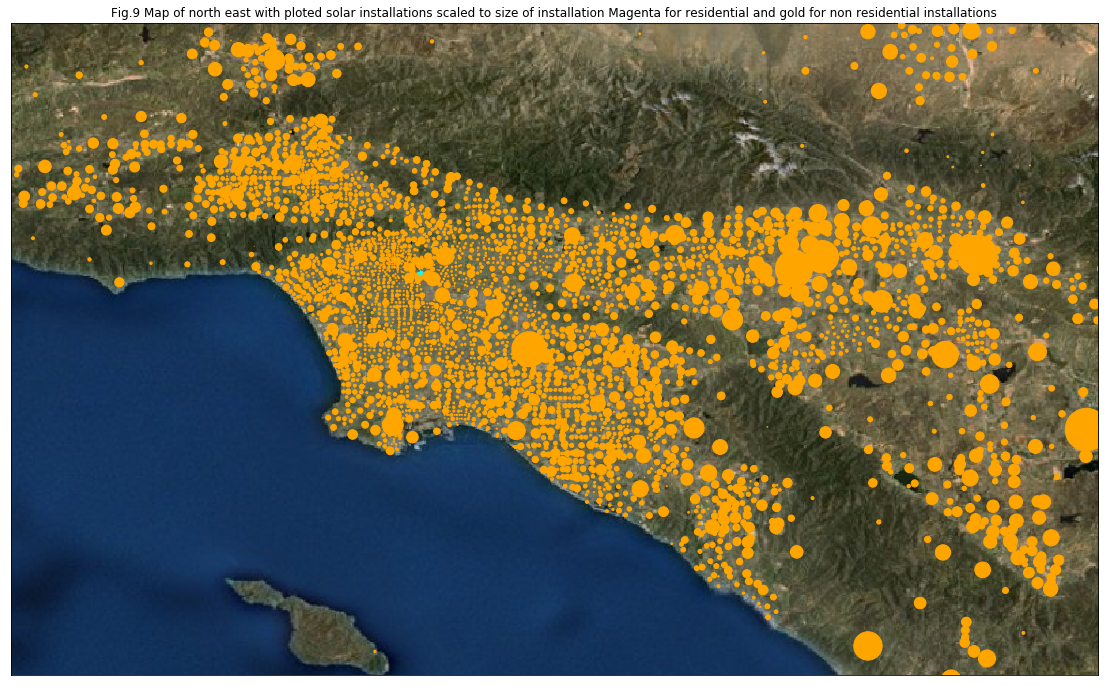

In [111]:
#los angeles
#urcr=34.432475, -117.126801
#llcr=33.288702, -118.981665

#Get county, state, solar pannel area, latitude and longitude data from Deep Solar Dataset
energytype = Deep_Solar_df.loc[:,['county', 'state','lat', 'lon','total_panel_area',"total_panel_area_nonresidential","total_panel_area_residential"]]

#Determine figure size 
plt.figure(figsize=(24,12))

#create map lcc projection of united states 
map = Basemap(llcrnrlon=-119,llcrnrlat=33.3,urcrnrlon=-117,urcrnrlat=34.5,projection='cyl',lat_1=34,lat_2=33.8,lon_0=-118, resolution='h', area_thresh=1000.)

#create satalite bacground image 
map.arcgisimage(server='http://server.arcgisonline.com/ArcGIS', service='ESRI_Imagery_World_2D', xpixels=800, ypixels=None, dpi=96, verbose=False,)
plt.title('Fig.9 Map of north east with ploted solar installations scaled to size of installation Magenta for residential and gold for non residential installations')

#x, y = map(lons, lats)
lons = energytype['lon'].to_numpy()
lats = energytype['lat'].to_numpy()
x, y = map(lons, lats)

#s1=(energytype['total_panel_area_residential']/100)
s=(energytype['total_panel_area']/100)

#plot points 
map.scatter(x, y,s=s,color='orange', alpha=1, zorder=10)
map.scatter( x= -118.2468,y=34.0407,marker = '*', color='cyan',alpha=1, zorder=10)
#34.0407° N, 118.2468° 
plt.show()

 If we look at two examples, New York City and Los Angeles we can see that decreases in P.V. installations in highly populated areas are not always the case in every urban hub. New York City shows a decrease in Manhattan, Brooklyn, and Queens in both a per capita comparison and a total system count. While Los Angeles has one of the highest counts of P.V. installations and increases near the downtown area, on a per capita basis Los Angeles is much closer to the rest of the country. These differences in per capita counts and total counts highlight some complexities in how we measure the success of P.V. Deployment in certain areas.  In the cases of P.V .installations per capita decreasing, this is likely due to the fact that in dense urban areas people often live in high rise apartments, where the amount of area exposed to sunlight decreases per person when more floors of living space are added to a building lot.
    The decreases seen in such cities like New York might be explained by a multitude of reasons that could further be explored. Such instances are listed below. 


- The opportunity cost of installing solar panels may be too high to warrant the installation, as that area may hold more pertinent uses.  
- Ownership of rooftops is likely more complicated in urban environments, with multiple owners of condo buildings, and a multitude of rental properties where landlords are trying to limit expenses.
- In areas with high rise buildings, there may be concern about recuperating expenses if large buildings are erected and block sunlight shortly after solar panels are installed. 
- Urban areas of the United States tend to have high gini coefficients suggesting large disparities in income, creating situations where a homeowner may be barely covering their expenses and may not be able to afford the upfront investment or qualify for financing of such a project. 
- Incentives and tax laws related to solar installations may be structured to benefit suburban areas because they tend to contain decisive political districts with a high number of swing voters and members belonging to both of the major political parties. This may lead lawmakers to design legislation that appeases this particular population.

The chart above suggests that more could be done to continue expanding the rooftop solar market into both dense cities and rural areas. We can also see that the price of electricity increases with population density as suggested by the color map nearly doubling for the densest areas. This tells us that there is a high demand for electricity in these urban areas which may increase the return on investment for rooftop solar. There is some evidence that this is begining to change in cities like new york as discussed in the New York Times article linked below.

https://www.nytimes.com/2019/07/10/nyregion/nyc-solar-power.html

There may also be some advantages to those living in rural areas to be more self-sufficient with their electricity using photovoltaics. Often in rural areas, electric power must be transported large distances to reach a small number of customers. This length of electrical infrastructure can be expensive to maintain with little incentive for companies to maintain and repair resulting in a higher number of and greater length of power loss in rural areas.  By incentivizing investment in energy storage systems and photovoltaics rural residents, may be capable of being entirely self-sufficient in their electricity consumption. 
Next, we will look at incentive structures by each State to understand how they might impact solar installations. 



### Question 2 :


 In the continental United States, what states have the highest per capita usage of solar power for both residential and non, and what influence do state incentives and net metering have over the deployment of photovoltaics?¶

In [112]:
# state abreviations dict. courtesy of Roger Allen can be found at https://gist.github.com/rogerallen/1583593
us_state_abbrev = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
                   'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC',
                   'Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL',
                   'Indiana': 'IN','Iowa': 'IA', 'Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
                   'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
                   'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
                   'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
                   'North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH',
                   'Oklahoma': 'OK','Oregon': 'OR','Palau': 'PW','Pennsylvania': 'PA','Puerto Rico': 'PR',
                   'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
                   'Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA',
                   'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',}


In [113]:
#clean census data 
census.columns = ['State', '2010_Census','Estimates_Base','2010','2011','2012','2013','2014','2015','2016','2017','2018_Census_Estimate']
# remove commas from numerical data
census['2010_Census'] = census['2010_Census'].str.replace(',', '', regex=False)
census['Estimates_Base'] = census['Estimates_Base'].str.replace(',', '', regex=False)
census['2018_Census_Estimate'] = census['2018_Census_Estimate'].str.replace(',', '', regex=False)

#convert Strings to Floats
census['2010_Census'] = pd.to_numeric(census['2010_Census'],errors='coerce')
census['Estimates_Base'] = pd.to_numeric(census['Estimates_Base'],errors='coerce')
census['2018_Census_Estimate'] = pd.to_numeric(census['2018_Census_Estimate'],errors='coerce')

#state data begins at index 8 
census = census.iloc[8:59,[0,1,2,11]]
census['State'] = census['State'].str.replace('.', '', regex=False)
census['state'] = census['State'].map(us_state_abbrev) 
census.set_index('state')

print()



In [114]:
#Clean and prepare gini DF and GDP per capita DF for merging 

#select state specific data and set Index to state abreviation
state_gini=state_gini.iloc[0:49,[1,2]]
state_gini['state']=state_gini['State'].map(us_state_abbrev)
state_gini.set_index('state')

#set index to state abreviations 
state_gdp['state']=state_gdp['Area'].map(us_state_abbrev)
state_gdp.rename(columns={'2013':'GDP_2013','2017':'GDP_2017'},inplace=True)
state_gdp.set_index('state')


#Merge gini and GDP data
gini_gdp_state=pd.merge(state_gdp,state_gini,on=('state'))
gini_gdp_state=gini_gdp_state.drop(columns=['State','Area','2014','2015','2016','Fips'])
gini_gdp_state=gini_gdp_state.set_index('state')

#Merge Census Data  with GDP and Gini
state_data=pd.merge(census,gini_gdp_state,on=('state'))

In [115]:
#clean and group Deep solar data by state 


# make all states uppercase
Deep_Solar_df["state"] = Deep_Solar_df["state"].apply(lambda x: x.upper())

# average Data
sum_group = Deep_Solar_df.groupby("state").sum()[['total_panel_area_residential','total_panel_area',
                                                  'solar_system_count','solar_system_count_residential',
                                                  'solar_system_count_nonresidential','total_panel_area_nonresidential']]
#summate data
mean_group = Deep_Solar_df.groupby("state").mean()[['net_metering','incentive_count_residential',
                                                    'incentive_count_nonresidential','incentive_residential_state_level',
                                                    'incentive_nonresidential_state_level', 'feedin_tariff','cooperate_tax',
                                                   'property_tax','sales_tax','rebate', 'lat','daily_solar_radiation']]
#merge data 
solar_by_state = pd.merge(sum_group, mean_group, left_index=True, right_index=True)






In [116]:
#Merge State data on deep solar and 


Deep_solar_state = pd.merge(solar_by_state, state_data, on = 'state')

#Create new parameters for state data
Deep_solar_state['solar_system_count_per_capita_state_level'] = (Deep_solar_state['solar_system_count']/Deep_solar_state['2018_Census_Estimate'])
Deep_solar_state['solar_system_count_residential_per_capita_state_level'] = (Deep_solar_state['solar_system_count_residential']/Deep_solar_state['2018_Census_Estimate'])
Deep_solar_state['solar_system_count_nonresidential_per_capita_state_level'] = (Deep_solar_state['solar_system_count_nonresidential']/Deep_solar_state['2018_Census_Estimate'])

Deep_solar_state['solar_pannel_area_per_capita_state_level'] = (Deep_solar_state['total_panel_area']/Deep_solar_state['2018_Census_Estimate'])
Deep_solar_state['residential_pannel_area_per_capita_state_level'] = (Deep_solar_state['total_panel_area_residential']/Deep_solar_state['2018_Census_Estimate'])
Deep_solar_state['nonresidential_pannel_area_per_capita_statelevel'] = (Deep_solar_state['total_panel_area_nonresidential']/Deep_solar_state['2018_Census_Estimate'])
Deep_solar_state['state'] = Deep_solar_state['state'].astype(str)



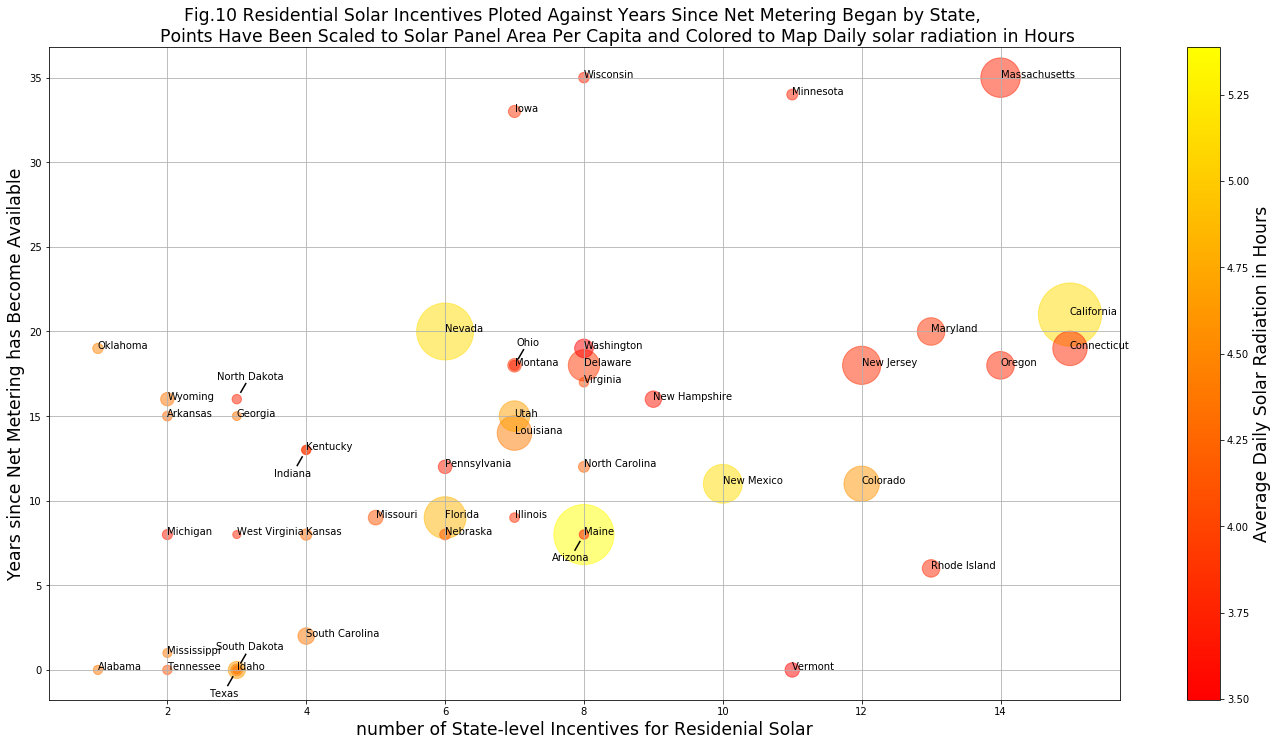

In [117]:
#create figure size
plt.figure(figsize=(24,12))
plt.grid()

#set x and y data for plot  
x2=Deep_solar_state['incentive_residential_state_level']
y1=Deep_solar_state['net_metering']

#plot points and scale to solar pannel area per capita 
s2=(Deep_solar_state['residential_pannel_area_per_capita_state_level']*10000)

#change color based on daily solar radiation 
cmap = plt.cm.autumn
norm = matplotlib.colors.Normalize(vmin=3.497283, vmax=5.386514)
c2 = cmap(norm(Deep_solar_state.daily_solar_radiation.values))

#plot points 
plt.scatter(x2,y1, s=s2,color=c2,alpha=.5,label='Inline label')

#label points in plot
for i, txt in enumerate( Deep_solar_state['State']):
    overlapstate=('Arizona','Indiana','Texas','South Dakota','North Dakota','Ohio')
    np.random.seed(2016)
    drotation = np.random.randint(0,120,50)

    if txt in overlapstate: 
        plt.text(x2[i], y1[i],s=txt,withdash=True, 
                dashdirection=((i+3)%3)%2,
                dashlength=10,
                rotation=0,
                dashrotation=60,
                dashpush=8)
    if txt not in overlapstate:  
        plt.annotate(txt,(x2[i], y1[i]))
        
#create labels for plot 
plt.xlabel('number of State-level Incentives for Residenial Solar',fontsize = 'xx-large')
plt.ylabel('Years since Net Metering has Become Available',fontsize = 'xx-large')
plt.title('''Fig.10 Residential Solar Incentives Ploted Against Years Since Net Metering Began by State, 
            Points Have Been Scaled to Solar Panel Area Per Capita and Colored to Map Daily solar radiation in Hours''',
           fontsize = 'xx-large')


#create color bar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Average Daily Solar Radiation in Hours', rotation=90,fontsize = 'xx-large')


plt.show()



In the Figure 10, above we see states plotted with the number of incentives for residential solar at the state level and the years since net metering has begun. Net metering is a term used to describe the ability for a resident to sell their electricity back to the grid and only be charged for the net amount of electricity they use. The bubbles are scaled to show solar panel area per capita and colored to show the hours of sunlight each state receives on average. From this chart, we can see that the size of the bubble increases as incentives increase and the years since net metering began increases we can also see that the states with the area of PV per capita seem to scale with sunlight as well with Nevada, California, and Arizona having some of the largest per capita installations. 


<function matplotlib.pyplot.show(*args, **kw)>

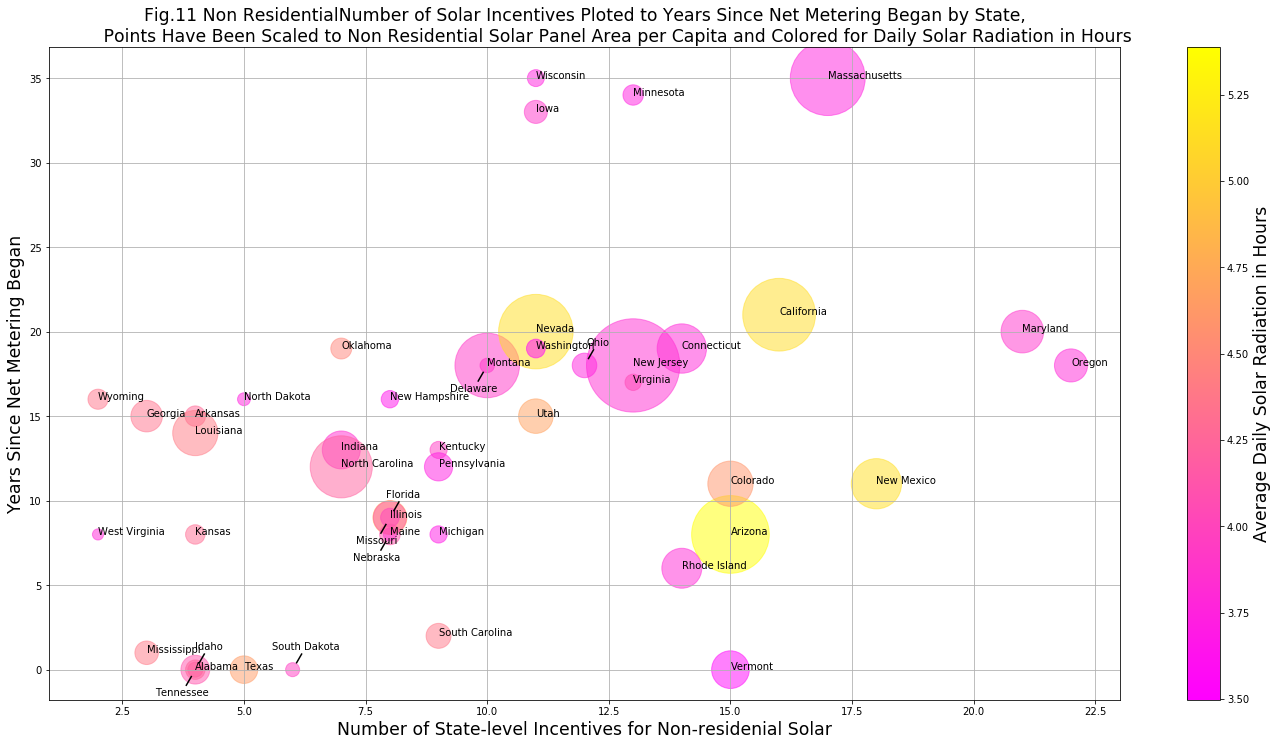

In [118]:
#create figure size
plt.figure(figsize=(24,12))
plt.grid()

#set x and y data for plot  
x=Deep_solar_state['incentive_nonresidential_state_level']
y=Deep_solar_state['net_metering']

#set scale to solar pannel area per capita 
s1=(Deep_solar_state['nonresidential_pannel_area_per_capita_statelevel']*10000)

#change color based on daily solar radiation 
cmap = plt.cm.spring
norm = matplotlib.colors.Normalize(vmin=3.497283, vmax=5.386514)
c2 = cmap(norm(Deep_solar_state.daily_solar_radiation.values))

#create plot 
plt.scatter(x,y,s=s1, color=c2, alpha=.5,label='Inline label')
#plt.scatter(x,y, s=s2,color='blue',alpha=.5,label='Inline label')


#label points in plot
for i, txt in enumerate( Deep_solar_state['State']):
    overlapstate=('Florida','Delaware','Idaho','South Dakota','Tennessee','Ohio', 'Nebraska', 'Missouri')
    np.random.seed(2016)
    drotation = np.random.randint(0,120,50)

    if txt in overlapstate: 
        plt.text(x[i], y[i],s=txt,withdash=True, 
                dashdirection=((i+3)%3)%2,
                dashlength=10,
                rotation=0,
                dashrotation=60,
                dashpush=8)
    if txt not in overlapstate:  
        plt.annotate(txt,(x[i], y[i]))
        
#create labels and keys for plot 
plt.xlabel('Number of State-level Incentives for Non-residenial Solar',fontsize = 'xx-large')
plt.ylabel('Years Since Net Metering Began',fontsize = 'xx-large')
plt.title('''Fig.11 Non ResidentialNumber of Solar Incentives Ploted to Years Since Net Metering Began by State,
             Points Have Been Scaled to Non Residential Solar Panel Area per Capita and Colored for Daily Solar Radiation in Hours ''',
           fontsize = 'xx-large')

#create color bar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Average Daily Solar Radiation in Hours',x=-2,y=0.5, rotation=90,fontsize = 'xx-large')


plt.show

When looking at the figure 11 above we can see that both incentives and net metering are important for the adoption of P.V. for nonresidential use. It should be noted that this only tells us the number of incentives available and not the amount each incentive is worth. It also appears that net metering has a small correlation with.
By looking at P.V. installations mapped onto bordering states we can see the drastic impact that state laws, taxes, and incentives can have on the deployment of solar P.V. 




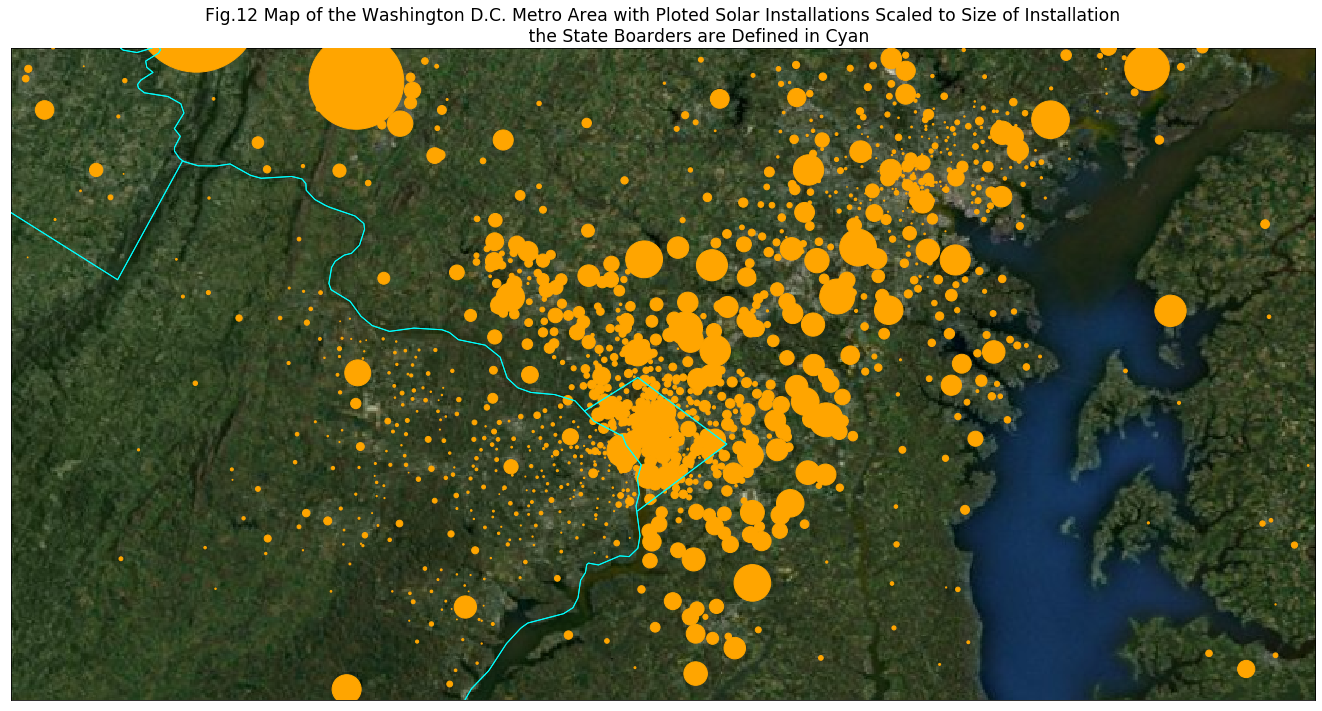

In [120]:
#DC Baltimor 
#llcr=38.540660, -77.879196
#urcr=39.519843, -76.258571
#mid=39.156135, -94.742782

#Get county, state, solar pannel area, latitude and longitude data from Deep Solar Dataset
energytype = Deep_Solar_df.loc[:,['county', 'state','lat', 'lon','total_panel_area',"total_panel_area_nonresidential","total_panel_area_residential"]]

#Determine figure size 
plt.figure(figsize=(24,12))

#create map lcc projection of united states 
map = Basemap(llcrnrlon=-78,llcrnrlat=38.5,urcrnrlon=-76,urcrnrlat=39.5,projection='cyl',lat_1=38,lat_2=38,lon_0=-77., resolution='h', area_thresh=1000.)
#fill in colors draw boundries for countries and states 
#map.drawmapboundary(fill_color='aqua')
#map.fillcontinents(color='tan',lake_color='blue')
#map.drawcountries(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
map.drawstates(linewidth=1, linestyle='solid', color='cyan', antialiased=3, ax=None, zorder=11)
#map.drawcoastlines()
#map.bluemarble()
map.arcgisimage(server='http://server.arcgisonline.com/ArcGIS', service='ESRI_Imagery_World_2D', xpixels=800, ypixels=None, dpi=96, verbose=False,)
#map.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
#map.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('''Fig.12 Map of the Washington D.C. Metro Area with Ploted Solar Installations Scaled to Size of Installation
             the State Boarders are Defined in Cyan''', fontsize='xx-large') 
lons = energytype['lon'].to_numpy()
lats = energytype['lat'].to_numpy()
#x, y = map(lons, lats)

x, y = map(lons, lats)

s1=(energytype['total_panel_area']/10)

#map.scatter(x, y,s=s1,color='gold', alpha=1, zorder=9)

map.scatter(x, y,s=s1,color='orange', alpha=1, zorder=10)


plt.show()

Here in Figure 12  drastic differences can see between the States of Maryland, and Virginia along with the District of Columbia. A sharp difference can be seen in the number and scale of solar installations, while Virginia and Maryland receive similar amounts of sunlight, and had started net metering within five years of one another; they differ markedly in the number of incentives they offer. 


### Question three: 

Nationally, what effect do electricity prices and sun exposure have on the deployment of solar technology?

<function matplotlib.pyplot.show(*args, **kw)>

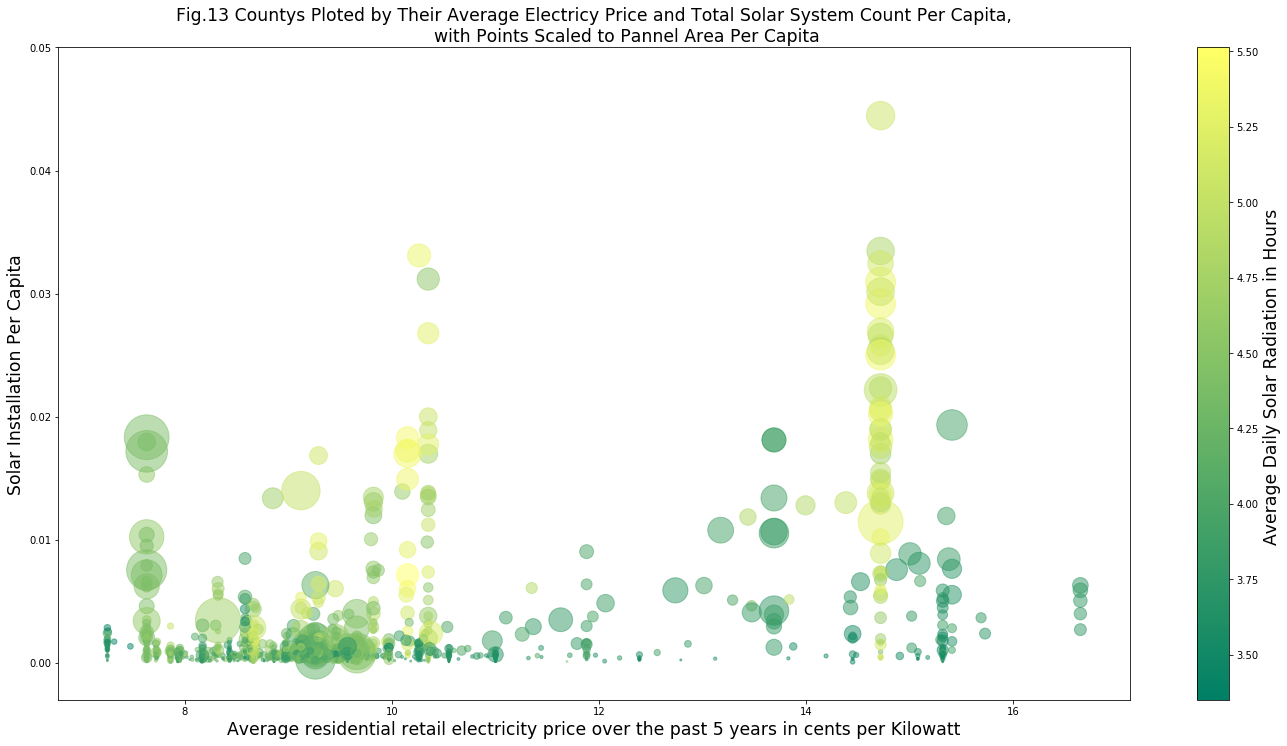

In [122]:
#generate Scatter plot of electricity prices and solar installations
#set plot size
plt.figure(figsize=(24,12))

# set coordinates for plot
x3=Deep_Solar_county['avg_electricity_retail_rate']
y3=Deep_Solar_county['county_solar_system_count_per_capita']


s3=Deep_Solar_county['county_solar_panel_area_per_capita']*500


#generate color map
cmap = plt.cm.summer 
norm = matplotlib.colors.Normalize(vmin= 3.350000, vmax=5.513125)
c1 = cmap(norm(Deep_Solar_county.daily_solar_radiation.values))

#Plot Points 
plt.scatter(x=x3,y=y3,s=s3,color= c1 , alpha=.5,label='Inline label')
plt.ylim(-0.003,0.05)

# Label Axis 
plt.xlabel('Average residential retail electricity price over the past 5 years in cents per Kilowatt',fontsize='xx-large')
plt.ylabel('Solar Installation Per Capita',fontsize='xx-large')
plt.title('''Fig.13 Countys Ploted by Their Average Electricy Price and Total Solar System Count Per Capita,
            with Points Scaled to Pannel Area Per Capita''',fontsize='xx-large')

#create and label color bar 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm).set_label('Average Daily Solar Radiation in Hours ', rotation=90,fontsize = 'xx-large')

plt.show 


In  Figure 13 above, counties are plotted by their average electricity prices and the number of solar installations per capita. The points are scaled to match the area of panels per capita. The color mapping relates to the hours of sunlight. This chart shows us that the number of solar installations increases with electricity prices especially under conditions with longer sun exposure. 


## Conclusions, and Potential future Research


From the data seen above, it appears that current solar installations peak at around 10,000 inhabitants per square mile, and can begin to decrease in certain urban hubs in number and on a per capita basis . In the plot of energy prices we see that a combination of high energy prices and hours of sunlight results in a larger number of photovoltaics. We can also see that there is a strong correlation between incentives and deployment of P.V. In order for states to keep their energy markets competitive for P.V. Current laws and incentives must remain in place, and be expanded to support both dense urban cities and rural areas. 
It may be possible to understand what specific tax breaks and incentives benefit the P.V. industry the most, by comparing specific laws amongst states. It would help if data could be collected from solar installations regarding what specific tax breaks and incentives were taken advantage of by owners. 
There could also be a chance to understand further, the value of P.V. as an environmental status item. By time-stamping data with the date of installation, it may be possible to understand in greater detail the effect of peers (i.e. neighbors) in changing the subjective norm of neighborhoods and increasing the adoption of residential solar. This has been looked at via surveys in germany and with other emission-free methods such as electric cars. 
Additionally if a dataset on hourly power consumption by location (zip code or county) was made available this might make it possible to understand how local weather impacts both power consumption and solar power production. This information along with United States roof data may be useful in determining to what extent solar power can be used to power the grid before some sort of energy storage is necessary. 

Further Reading

The value of environmental status signaling
Author:  Delgadoa, Harrigerb, Khannac, et al

https://www.sciencedirect.com/science/article/pii/S0921800915000075


Intentions to adopt photovoltaic systems depend on homeowners' expected personal gains and behavior of peers
Author: Korcaj, Hahnel, Spada, et al

https://www.sciencedirect.com/science/article/pii/S0960148114006326


DeepSolar: A Machine Learning Framework to Efficiently Construct a Solar Deployment Database in the United States
Authors: Yu, Wang, Majumdar, and Rajagopal

https://www.cell.com/joule/fulltext/S2542-4351(18)30570-1


